In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Example 1

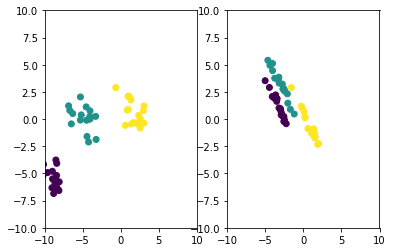

In [3]:
d1,y = make_blobs(n_samples=50,random_state=170,)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
d2 = np.dot(d1, transformation) 

plt.figure()
plt.subplot(1,2,1)
plt.scatter(d1[:,0],d1[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.subplot(1,2,2)
plt.scatter(d2[:,0],d2[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

In [8]:
X = d2

modelPCA = PCA(n_components=2)
Xpca = modelPCA.fit_transform(X)

modelLDA = LinearDiscriminantAnalysis(n_components=2)
Xlda = modelLDA.fit_transform(X,y)

print('X',X.shape)
print('Xpca',Xpca.shape)
print('Xlda',Xlda.shape)

X (50, 2)
Xpca (50, 2)
Xlda (50, 2)


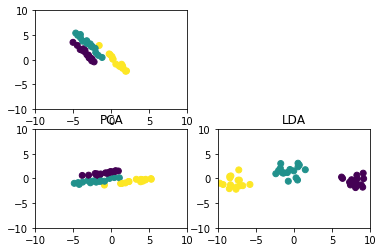

In [9]:
plt.figure()
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])


plt.subplot(2,2,3)
plt.title('PCA')
plt.scatter(Xpca[:,0],Xpca[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])

plt.subplot(2,2,4)
plt.title('LDA')
plt.scatter(Xlda[:,0],Xlda[:,1],c=y)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

# Example 2

In [10]:
X,y = load_digits(return_X_y = True)
print('X',X.shape)
print('y',len(y))

X (1797, 64)
y 1797


In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
modelPCA = PCA(n_components=2)
Xpca = modelPCA.fit_transform(Xtrain)

modelLDA = LinearDiscriminantAnalysis(n_components=2)
Xlda = modelLDA.fit_transform(Xtrain,ytrain)

print('Xtrain',Xtrain.shape)
print('Xpca',Xpca.shape)
print('Xlda',Xlda.shape)

Xtrain (1257, 64)
Xpca (1257, 2)
Xlda (1257, 2)


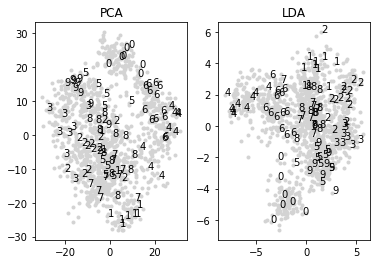

In [15]:
idx = np.random.permutation(len(Xtrain))[:100]

plt.figure()
plt.subplot(1,2,1)
plt.title('PCA')
plt.plot(Xpca[:,0],Xpca[:,1],'.',color='lightgray')
for i in idx:
    plt.text(Xpca[i,0],Xpca[i,1],str(ytrain[i]))

plt.subplot(1,2,2)
plt.title('LDA')
plt.plot(Xlda[:,0],Xlda[:,1],'.',color='lightgray')
for i in idx:
    plt.text(Xlda[i,0],Xlda[i,1],str(ytrain[i]))
plt.show()

In [17]:
print('PCA',modelPCA.explained_variance_ratio_)
print('LDA',modelLDA.explained_variance_ratio_)

PCA [0.14870031 0.13631282]
LDA [0.28288259 0.18750381]


# How to use dimensionality reduction for solving a classification problem

In [18]:
X,y = load_digits(return_X_y = True)
print('X',X.shape)
print('y',len(y))

X (1797, 64)
y 1797


In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Sin reducción de dimensionalidad

In [29]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
confusion = confusion_matrix(ytest,ypred)
f1 = f1_score(ytest,ypred,average='macro')
print(f1)
print(confusion)

0.9648353319332248
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Con PCA

In [30]:
modelpca = PCA(n_components=40)
modelpca.fit(Xtrain)
XPCAtrain = modelpca.transform(Xtrain)
XPCAtest = modelpca.transform(Xtest)
print('Xtrain',Xtrain.shape)
print('XPCAtrain',XPCAtrain.shape)

model = LogisticRegression()
model.fit(XPCAtrain,ytrain)
ypred = model.predict(XPCAtest)
confusion = confusion_matrix(ytest,ypred)
f1 = f1_score(ytest,ypred,average='macro')
print(f1)
print(confusion)

Xtrain (1257, 64)
XPCAtrain (1257, 40)
0.9720884522335643
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### LDA

In [33]:
modellda = LinearDiscriminantAnalysis()
modellda.fit(Xtrain,ytrain)
XLDAtrain = modellda.transform(Xtrain)
XLDAtest = modellda.transform(Xtest)
print('Xtrain',Xtrain.shape)
print('XLDAtrain',XLDAtrain.shape)

model = LogisticRegression()
model.fit(XLDAtrain,ytrain)
ypred = model.predict(XLDAtest)
confusion = confusion_matrix(ytest,ypred)
f1 = f1_score(ytest,ypred,average='macro')
print(f1)
print(confusion)

Xtrain (1257, 64)
XLDAtrain (1257, 9)
0.9468204328288486
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 46  2  0  0  0  0  0  2  0]
 [ 0  0 46  1  0  0  0  0  0  0]
 [ 0  0  1 51  0  1  0  0  1  0]
 [ 0  1  0  0 57  0  1  0  1  0]
 [ 0  0  1  0  0 62  1  1  0  1]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  3  0  0  0  1  0  0 39  0]
 [ 1  0  0  1  1  1  0  0  2 53]]
